In [178]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from pcigale.sed import SED
from pcigale.sed import utils
from pcigale.sed_modules import get_module

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [20 , 10]

In [179]:
# Now read one of the SDSS spectra
hdu_data = fits.open('Spectra\SDSS_spec_G3.fits')
spflux_data = hdu_data[0].data*1e-17
spwave_data = hdu_data[0].header['CRVAL1']+np.arange(hdu_data[0].header['NAXIS1'])*hdu_data[0].header['CDELT1'] 
redshift = hdu_data[0].header['REDSHIFT']
spwave_data = spwave_data/(1+redshift)

In [180]:
conversion_factor = (1e-5)**2 / (redshift*3e10/70e5)**2
conversion_factor

9.94310111119228e-15

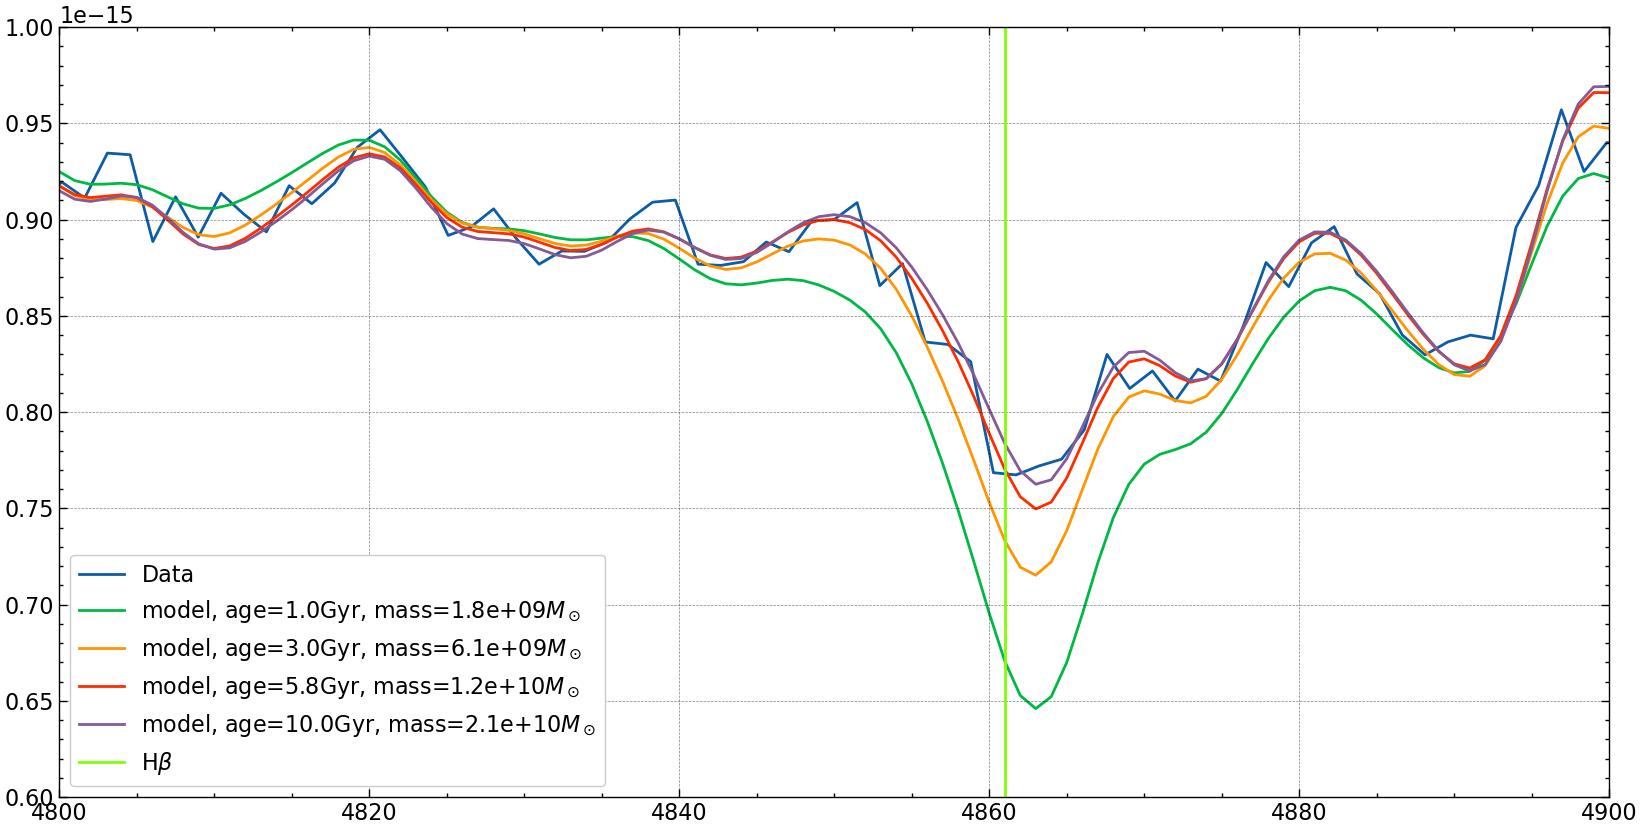

In [181]:
mass = np.array([1.85e9, 6.1e9, 1.25e10, 2.1e10])

hdu_model_1 = fits.open('HR_Spectra\CIGALE_SSP_HR.fits')
spwave_model_1 = hdu_model_1[1].header['CRVAL1']+np.arange(hdu_model_1[1].header['NAXIS1'])*hdu_model_1[1].header['CDELT1'] 
spflux_model_1 = hdu_model_1[1].data*conversion_factor*mass[0]
age_model_1 = hdu_model_1[1].header['AGE']

hdu_model_2 = fits.open('HR_Spectra\CIGALE_SSP_HR.fits')
spwave_model_2 = hdu_model_2[2].header['CRVAL1']+np.arange(hdu_model_2[2].header['NAXIS1'])*hdu_model_2[2].header['CDELT1'] 
spflux_model_2 = hdu_model_2[2].data*conversion_factor*mass[1]
age_model_2 = hdu_model_2[2].header['AGE']

hdu_model_3 = fits.open('HR_Spectra\CIGALE_SSP_HR.fits')
spwave_model_3 = hdu_model_3[3].header['CRVAL1']+np.arange(hdu_model_3[3].header['NAXIS1'])*hdu_model_3[3].header['CDELT1'] 
spflux_model_3 = hdu_model_3[3].data*conversion_factor*mass[2]
age_model_3 = hdu_model_3[3].header['AGE']

hdu_model_4 = fits.open('HR_Spectra\CIGALE_SSP_HR.fits')
spwave_model_4 = hdu_model_4[4].header['CRVAL1']+np.arange(hdu_model_4[4].header['NAXIS1'])*hdu_model_4[4].header['CDELT1'] 
spflux_model_4 = hdu_model_4[4].data*conversion_factor*mass[3]
age_model_4 = hdu_model_4[4].header['AGE']

plt.plot(spwave_data, spflux_data, label='Data', zorder=0)
plt.plot(spwave_model_1, spflux_model_1, label=f'model, age={age_model_1/1000}Gyr, mass={mass[0]:.1e}$M_\odot$', zorder=0)
plt.plot(spwave_model_2, spflux_model_2, label=f'model, age={age_model_2/1000}Gyr, mass={mass[1]:.1e}$M_\odot$', zorder=0)
plt.plot(spwave_model_3, spflux_model_3, label=f'model, age={age_model_3/1000}Gyr, mass={mass[2]:.1e}$M_\odot$', zorder=0)
plt.plot(spwave_model_4, spflux_model_4, label=f'model, age={age_model_4/1000}Gyr, mass={mass[3]:.1e}$M_\odot$', zorder=0)
plt.axvline(4861, label='H$\\beta$', color='chartreuse')
plt.xlim(4800, 4900)
plt.ylim(0.6e-15, 1.e-15)
plt.legend()

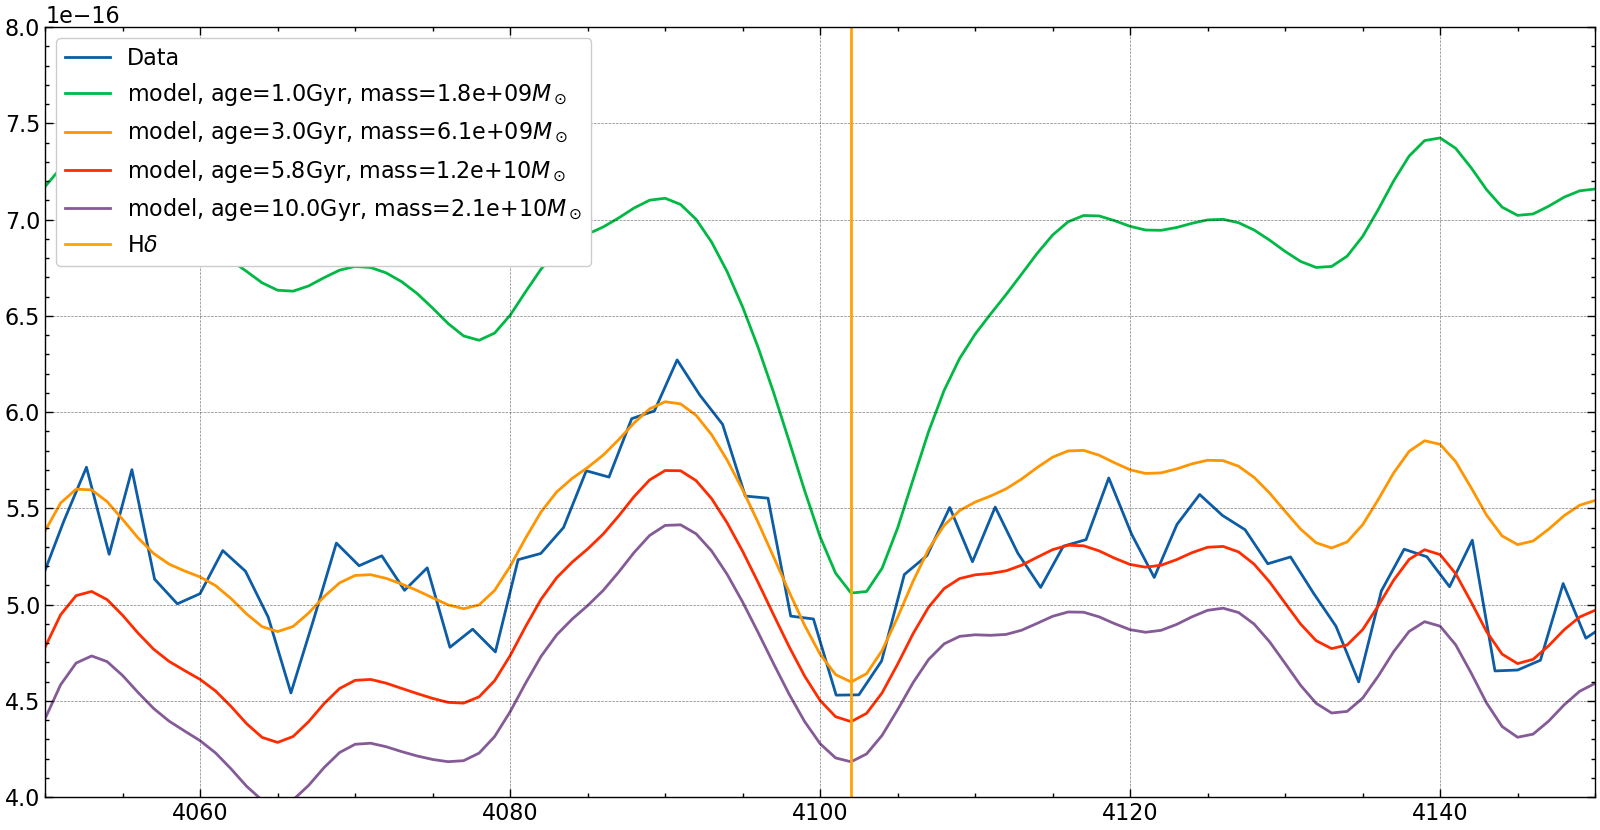

In [182]:
plt.plot(spwave_data, spflux_data, label='Data', zorder=0)
plt.plot(spwave_model_1, spflux_model_1, label=f'model, age={age_model_1/1000}Gyr, mass={mass[0]:.1e}$M_\odot$', zorder=0)
plt.plot(spwave_model_2, spflux_model_2, label=f'model, age={age_model_2/1000}Gyr, mass={mass[1]:.1e}$M_\odot$', zorder=0)
plt.plot(spwave_model_3, spflux_model_3, label=f'model, age={age_model_3/1000}Gyr, mass={mass[2]:.1e}$M_\odot$', zorder=0)
plt.plot(spwave_model_4, spflux_model_4, label=f'model, age={age_model_4/1000}Gyr, mass={mass[3]:.1e}$M_\odot$', zorder=0)
plt.axvline(4102, label='H$\\delta$', color='orange')
plt.xlim(4050, 4150)
plt.ylim(0.4e-15, 0.8e-15)
plt.legend()